In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_science_job.csv')

In [2]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
'''
taking the column names of only those who have missing values less than 0.05 and greater than 0 (we don't need columns with 0 missing values
obviously).
we are doing this with assumption of CCA, as in, it is applied only when missing values less than 0.05 for each column.
'''
filtered_cols = df.columns[(df.isnull().mean() > 0) & (df.isnull().mean() < 0.05)].tolist()

In [4]:
filtered_cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [5]:
tempdf=df[filtered_cols]
tempdf

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [6]:
dropped_df=tempdf.dropna() #CCA applied
dropped_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [7]:
'''
this is just to show the difference between number of rows in CCA applied data and original data.
'''
dropped_df.shape, tempdf.shape

((17182, 5), (19158, 5))

### Check if the distribution is same for original data and CCA data

###1. NUMERICAL COLUMNS

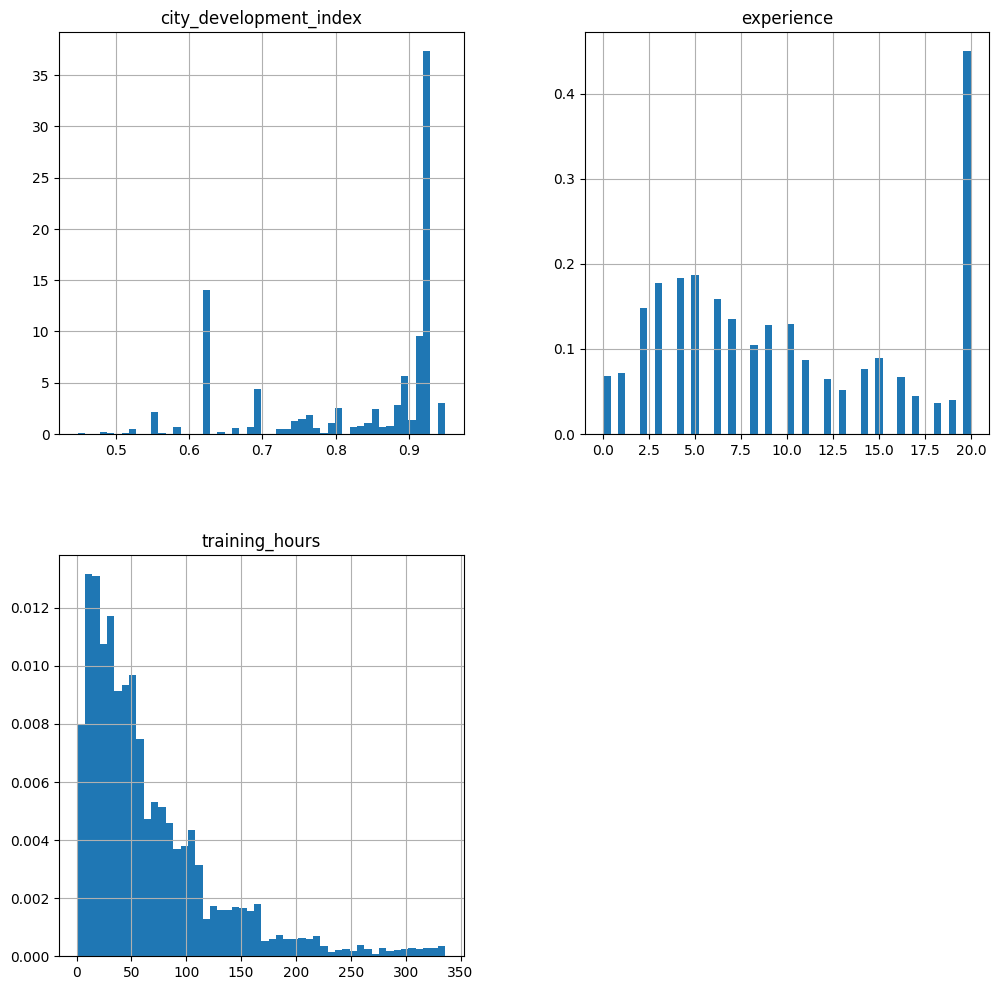

In [8]:
#ORIGINAL DATA:- (NUMERICAL COLUMNS DISTRIBUTION CHECK)
'''
as it is a histogram, it is applied only to the numerical columns.
'''
tempdf.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

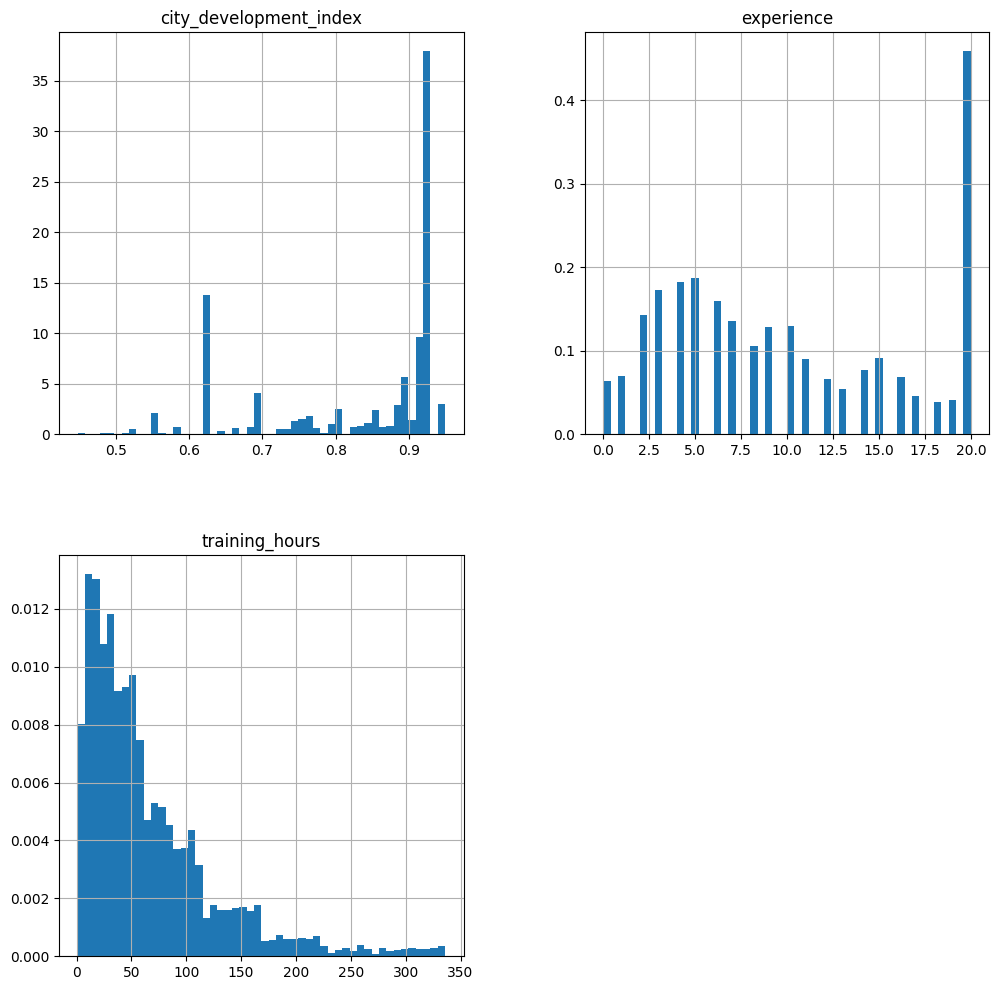

In [9]:
#CCA DATA numerical columns check:-
'''
you can see how distribution of these columns brought little to no differences in the distribution, proving that for these columns, the
missing data was MCAR.
'''
dropped_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

###2. CATEGORICAL COLUMNS

In [10]:

temp = pd.concat([
            #each category number of values / total values in that categorical column (original data)
            tempdf['enrolled_university'].value_counts() / len(tempdf),

            #CCA data
            dropped_df['enrolled_university'].value_counts() / len(dropped_df)
        ],
        axis=1)

temp.columns = ['original', 'cca']

temp
'''
we can see that ratio of each subtype of the categorical column enrolled_university is still the same, proving that the distribution of
even the categorical data hasn't changed significantly, and hence the missing data in categorical columns too was MCAR.
'''

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
